# 드라이브 마운트

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 이미지 로딩하기

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

fstr = '/content/drive/My Drive/Digital Image Processing/image/Lung-ROI-segmentation.png'
img_ori = cv2.imread(fstr)

if img_ori is None:
    print('Error : Loading image')
else:
    print('OK : Loading image')
    

OK : Loading image


복사본 만들기

In [49]:
img = img_ori.copy()

In [50]:
print(img.shape)

(279, 850, 3)


# 이미지를 gray_scale로 변환하기

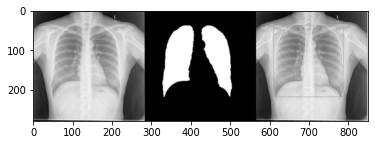

In [51]:
img = cv2.imread(fstr, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)

# 이미지 자르기

In [58]:
print(img.shape)

(279, 850)


In [70]:
fstr_0 = os.path.join(fstr,'Lung-ROI-segmentation.png')
img_0 = cv2.imread(fstr_0)
print(img_0.shape)

img_hsplit = np.hsplit(img_0,(283,284,567,568))
print(len(img_hsplit))
plt.figure()

plt.imshow(img_hsplit[0])
plt.figure()

plt.imshow(img_hsplit[2])
plt.figure()

plt.imshow(cv2.bitwise_and(img_hsplit[0],img_hsplit[2]))
plt.show()

AttributeError: ignored

In [71]:
fstr_1 = os.path.join(fstr,'Lung.jpg')
cv2.imwrite(fstr_1, cv2.cvtColor(img_hsplit[0],cv2.COLOR_BGR2GRAY))

error: ignored

In [44]:
g = cv2.cvtColor(img_hsplit[2],cv2.COLOR_BGR2GRAY)
_, gb = cv2.threshold(g,1,255,cv2.THRESH_BINARY)
#mask = cv2.cvtColor(g,cv2.COLOR_GRAY2BGR)

fstr_2 = os.path.join(fstr,'Lung_mask.png')
cv2.imwrite(fstr_2, cv2.cvtColor(img_hsplit[2],cv2.COLOR_BGR2GRAY))

True

# ROI masking

In [45]:
fstr_1 = os.path.join(fstr,'Lung.jpg')
fstr_2 = os.path.join(fstr,'Lung_mask.png')
img  = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_2,cv2.IMREAD_GRAYSCALE) 

(279, 283)
(279, 283)


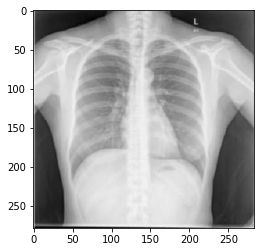

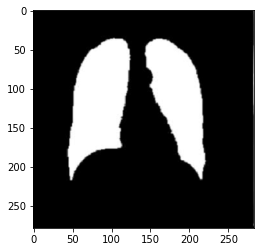

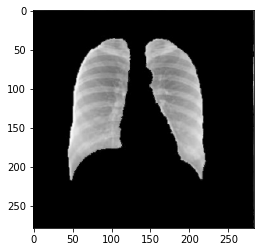

In [46]:
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)
print(img.shape)
print(mask.shape)

#_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
masked_roi = cv2.bitwise_and(img,mask)


plt.figure()
plt.imshow(masked_roi,cmap=plt.cm.gray)
plt.show()